In [9]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
## Define 2 random distributions
def generate_t_statistic(a_t, b_t, a_c, b_c, n_t, n_c):
    """
    a_t, b_t: shape parameters of beta distribution for test group
    a_c, b_c: shape parameters of beta distribution for control group
    n_t: sample size of test group
    n_c: sample size of control group
    """

    Xt, Xc = beta.rvs(a_t, b_t, size=n_t), beta.rvs(a_c, b_c, size=n_c)
    Xt_bar, Xc_bar = np.mean(Xt), np.mean(Xc)
    sigma2_t = 1.0 / (n_t - 1) * np.sum((Xt - Xt_bar) ** 2)
    sigma2_c = 1.0 / (n_c - 1) * np.sum((Xc - Xc_bar) ** 2)

    t = (Xt_bar - Xc_bar) * 1.0 / np.sqrt(sigma2_t / n_t + sigma2_c / n_c)

    return t


In [11]:
def t_list(a_t, b_t, a_c, b_c, n_t, n_c, repetition):
    output = []
    for rep in range(repetition):
        t = generate_t_statistic(a_t, b_t, a_c, b_c, n_t, n_c)
        output.append(t)
    return output


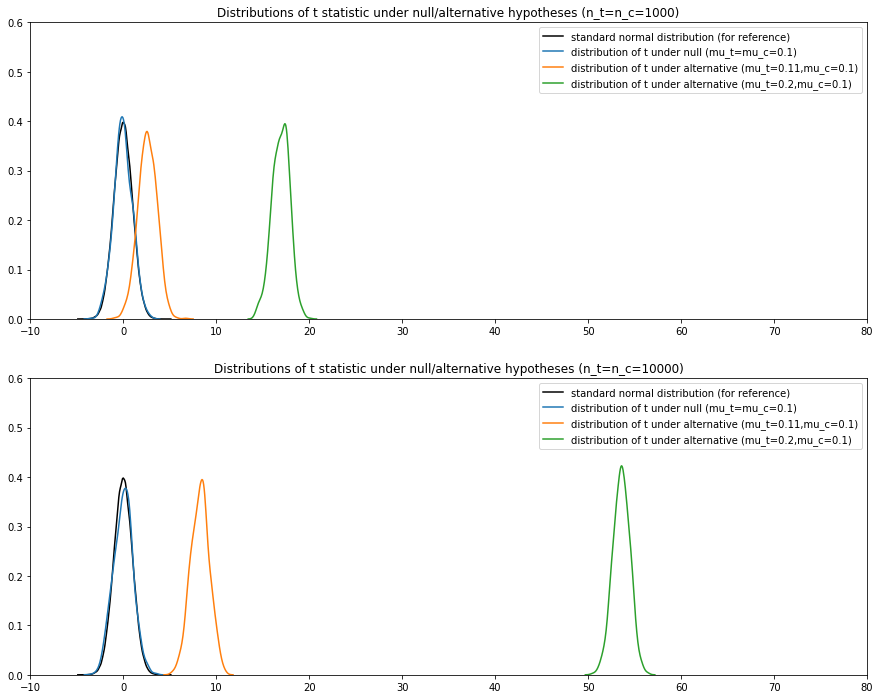

In [23]:
# beta parent
repetition = 1000
standard_normal = np.random.normal(0, 1, 100000)


def plot_distributions(n):
    """
    n: sample size
    """
    t_list_1 = t_list(1, 9, 1, 9, n, n, repetition)
    t_list_2 = t_list(1, 8, 1, 9, n, n, repetition)
    t_list_3 = t_list(1, 4, 1, 9, n, n, repetition)

    sns.distplot(
        standard_normal,
        hist=False,
        label="standard normal distribution (for reference)",
        color="black",
    )
    sns.distplot(
        t_list_1, hist=False, label="distribution of t under null (mu_t=mu_c=0.1)"
    )
    sns.distplot(
        t_list_2,
        hist=False,
        label="distribution of t under alternative (mu_t=0.11,mu_c=0.1)",
    )
    sns.distplot(
        t_list_3,
        hist=False,
        label="distribution of t under alternative (mu_t=0.2,mu_c=0.1)",
    )

    plt.xlim(-10, 80)
    plt.ylim(0, 0.6)
    plt.legend(loc="upper right")
    plt.title("Distributions of t statistic under null/alternative hypotheses (n_t=n_c=" + str(n) + ")")

    return


plt.figure(figsize=(15, 12))
plt.subplot(2, 1, 1)
plot_distributions(1000)
plt.subplot(2, 1, 2)
plot_distributions(10000)
plt.show()


### Experience the magnitude of t-statistic under the null or alternative hypothesis

In [18]:
n_t = n_c = 1000

In [19]:
# under the null hypothesis
# mu_t = mu_c = 0.1
t = generate_t_statistic(1, 9, 1, 9, n_t, n_c)
t


0.10565190184303601

In [20]:
# under the alternative hypothesis
# mu_t=0.2, mu_c=0.1
t = generate_t_statistic(1, 4, 1, 9, n_t, n_c)
t


17.765224566855405